## How to Import Stock Prices from Yahoo Finance

In [91]:
import pandas as pd
import pandas_datareader as web
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

In [59]:
%%time
stocks = ['^DJI', '^GSPC', 'JPM', 'AAPL', 'C','TSLA']
start = '2000-01-01'
end = dt.date.today()

df = web.DataReader(stocks,data_source='yahoo',start=start,end=end)

CPU times: user 461 ms, sys: 18.5 ms, total: 479 ms
Wall time: 3.78 s


In [51]:
df.head()

Attributes     Adj Close                                                            Close                                                          High                                                             Low                                                            Open                                                         Volume                                                       
Symbols             ^DJI        ^GSPC        JPM      AAPL           C TSLA          ^DJI        ^GSPC        JPM      AAPL        C TSLA          ^DJI        ^GSPC        JPM      AAPL          C TSLA          ^DJI        ^GSPC        JPM      AAPL          C TSLA          ^DJI        ^GSPC        JPM      AAPL          C TSLA         ^DJI         ^GSPC         JPM         AAPL          C TSLA
Date                                                                                                                                                                                                                                                                                                                                                                                                         
2000-01-03  11357.509766  1455.219971  26.407299  3.470226  330.374451  NaN  11357.509766  1455.219971  48.583332  3.997768  397.500  NaN  11522.009766  1478.000000  50.250000  4.017857  417.18750  NaN  11305.690430  1438.359985  48.083332  3.631696  390.00000  NaN  11501.849609  1469.250000  49.833332  3.745536  417.18750  NaN  169750000.0  9.318000e+08  12019200.0  133949200.0  1681900.0  NaN
2000-01-04  10997.929688  1399.420044  25.901106  3.177650  310.115692  NaN  10997.929688  1399.420044  47.250000  3.660714  373.125  NaN  11350.059570  1455.219971  47.458332  3.950893  391.40625  NaN  10986.450195  1397.430054  46.125000  3.613839  373.12500  NaN  11349.750000  1455.219971  47.083332  3.866071  390.00000  NaN  178420000.0  1.009000e+09  11723400.0  128094400.0  2403200.0  NaN
2000-01-05  11122.650391  1402.109985  25.741232  3.224152  322.582672  NaN  11122.650391  1402.109985  46.958332  3.714286  388.125  NaN  11215.099609  1413.270020  48.375000  3.948661  390.00000  NaN  10938.669922  1377.680054  46.000000  3.678571  371.25000  NaN  10989.370117  1399.420044  46.833332  3.705357  381.56250  NaN  203190000.0  1.085500e+09   8714500.0  194580400.0  1742500.0  NaN
2000-01-06  11253.259766  1403.449951  26.106668  2.945139  338.166443  NaN  11253.259766  1403.449951  47.625000  3.392857  406.875  NaN  11313.450195  1411.900024  48.625000  3.821429  410.15625  NaN  11098.450195  1392.099976  46.500000  3.392857  384.37500  NaN  11113.370117  1402.109985  46.750000  3.790179  384.84375  NaN  176550000.0  1.092300e+09   8369200.0  191993200.0  1863200.0  NaN
2000-01-07  11522.559570  1441.469971  26.586336  3.084645  336.608063  NaN  11522.559570  1441.469971  48.500000  3.553571  405.000  NaN  11528.139648  1441.469971  49.000000  3.607143  412.03125  NaN  11239.919922  1400.729980  47.333332  3.410714  396.09375  NaN  11247.059570  1403.449951  48.416668  3.446429  405.00000  NaN  184900000.0  1.225200e+09   6571900.0  115183600.0  1394500.0  NaN

In [52]:
# to adjust the table such that it shows all columns
pd.set_option('display.max_column',100,'display.width',1000)

In [53]:
df.tail()

Attributes     Adj Close                                                                     Close                                                                      High                                                                       Low                                                                     Open                                                                   Volume                                                              
Symbols             ^DJI        ^GSPC         JPM        AAPL          C        TSLA          ^DJI        ^GSPC         JPM        AAPL          C        TSLA          ^DJI        ^GSPC         JPM        AAPL          C        TSLA          ^DJI        ^GSPC        JPM        AAPL          C        TSLA          ^DJI        ^GSPC         JPM        AAPL          C        TSLA         ^DJI         ^GSPC         JPM        AAPL           C        TSLA
Date                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
2020-04-07  22653.859375  2659.409912   90.639999  259.429993  41.250000  545.450012  22653.859375  2659.409912   90.639999  259.429993  41.250000  545.450012  23617.240234  2756.889893   94.500000  271.700012  45.590000  565.000000  22634.449219  2657.669922  90.379997  259.000000  41.119999  532.340027  23537.439453  2738.649902   94.449997  270.799988  44.810001  545.000000  594660000.0  7.040720e+09  22563800.0  50721800.0  35220700.0  17919800.0
2020-04-08  23433.570312  2749.979980   94.300003  266.070007  44.259998  548.840027  23433.570312  2749.979980   94.300003  266.070007  44.259998  548.840027  23513.400391  2760.750000   94.860001  267.369995  44.450001  557.210022  22682.990234  2663.300049  90.550003  261.230011  41.970001  533.330017  22893.470703  2685.000000   92.099998  262.739990  42.849998  554.200012  472740000.0  5.856370e+09  22903300.0  42223800.0  32944800.0  12656000.0
2020-04-09  23719.369141  2789.820068  102.760002  267.989990  47.410000  573.000000  23719.369141  2789.820068  102.760002  267.989990  47.410000  573.000000  24008.990234  2818.570068  104.389999  270.070007  49.220001  575.179993  23504.089844  2762.360107  96.889999  264.700012  46.369999  557.109985  23690.660156  2776.989990   96.919998  268.700012  46.939999  562.090027  566400000.0  7.880140e+09  42084700.0  40529100.0  43659200.0  13650000.0
2020-04-13  23390.769531  2761.629883   98.190002  273.250000  46.680000  650.950012  23390.769531  2761.629883   98.190002  273.250000  46.680000  650.950012  23698.929688  2782.459961  103.110001  273.700012  47.570000  652.000000  23095.349609  2721.169922  97.300003  265.829987  45.270000  580.530029  23698.929688  2782.459961  103.110001  268.309998  47.500000  590.159973  394320000.0  5.274310e+09  26849900.0  32663400.0  27918500.0  22309500.0
2020-04-14  23949.759766  2846.060059   95.500000  287.049988  45.419998  709.890015  23949.759766  2846.060059   95.500000  287.049988  45.419998  709.890015  24040.580078  2851.850098  102.000000  288.049988  47.740002  741.729980  23683.439453  2805.100098  93.639999  278.049988  43.525002  692.530029  23690.570312  2805.100098  101.019997  280.000000  47.660000  698.969971  485909969.0  3.086182e+09  43629828.0  47128356.0  38837129.0  29680890.0

In [54]:
(df.Close - df.Open).pct_change()

Symbols,^DJI,^GSPC,JPM,AAPL,C,TSLA
Date,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,1.437444,2.977178,-1.133334,-1.814158,-0.142857,NaN
2000-01-05,-1.378831,-1.048207,-0.250006,-1.043478,-1.388889,NaN
2000-01-06,0.049590,-0.501861,6.000000,-45.500174,2.357143,NaN
2000-01-07,0.969409,27.373873,-0.904763,-1.269663,-1.000000,NaN
...,...,...,...,...,...,...
2020-04-07,-1.895799,-1.927870,-9.106357,-1.982713,-3.696971,-0.910711
2020-04-08,-1.611263,-1.820040,-1.577429,-1.292878,-1.396067,-12.910755
2020-04-09,-0.946845,-0.802553,1.654542,-1.213219,-0.666666,-3.035448


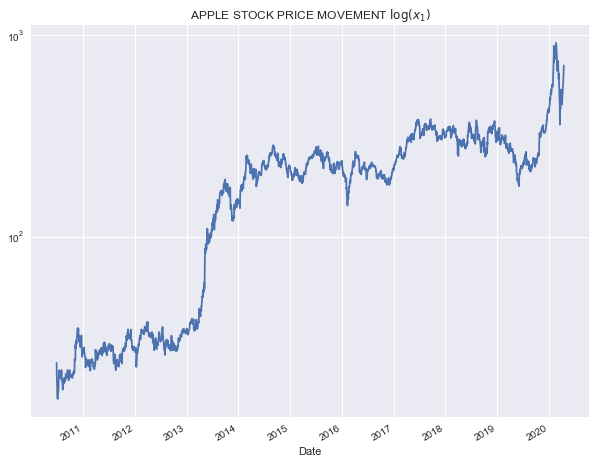

In [92]:
df.Close.TSLA.plot(figsize=(10,8),
                         kind='line',
                         title=r'APPLE STOCK PRICE MOVEMENT $\log(x_1)$',
                        logy=True);

In [57]:
df.Close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5102 entries, 2000-01-03 to 2020-04-14
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^DJI    5102 non-null   float64
 1   ^GSPC   5102 non-null   float64
 2   JPM     5102 non-null   float64
 3   AAPL    5102 non-null   float64
 4   C       5102 non-null   float64
 5   TSLA    2465 non-null   float64
dtypes: float64(6)
memory usage: 279.0 KB


In [58]:
df.Close.pct_change().corr()

Symbols,^DJI,^GSPC,JPM,AAPL,C,TSLA
Symbols,,,,,,
^DJI,1.000000,0.970688,0.730896,0.506072,0.655701,0.355522
^GSPC,0.970688,1.000000,0.751255,0.552898,0.681729,0.381095
JPM,0.730896,0.751255,1.000000,0.369894,0.744640,0.271165
AAPL,0.506072,0.552898,0.369894,1.000000,0.323405,0.282859
C,0.655701,0.681729,0.744640,0.323405,1.000000,0.291942
TSLA,0.355522,0.381095,0.271165,0.282859,0.291942,1.000000


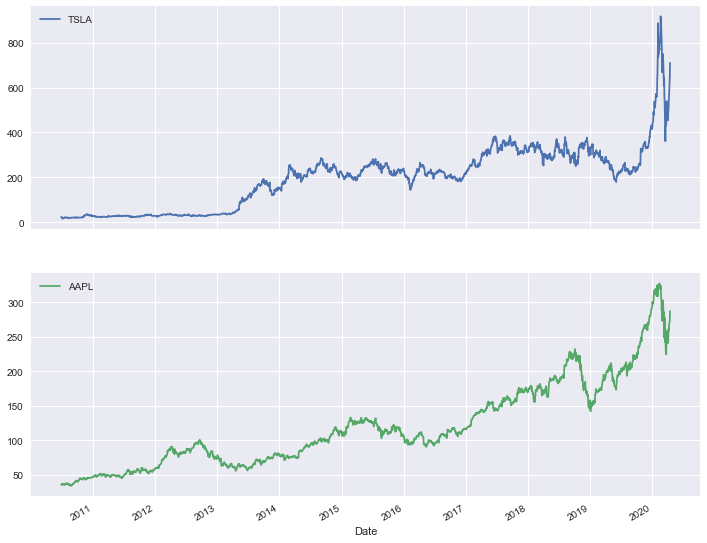

In [95]:
# To show only few columns put them in double brackets [[]]
# Here we filter out the part of the data where TSLA is N/A
# we use subplots
df.Close[['TSLA','AAPL']].loc[df.Close.TSLA.notna()].plot(subplots=True,logy=False,figsize=(12,10));

In [96]:
# Find empty values NA
df.Close.isna().sum()

Symbols
^DJI        0
^GSPC       0
JPM         0
AAPL        0
C           0
TSLA     2637
dtype: int64

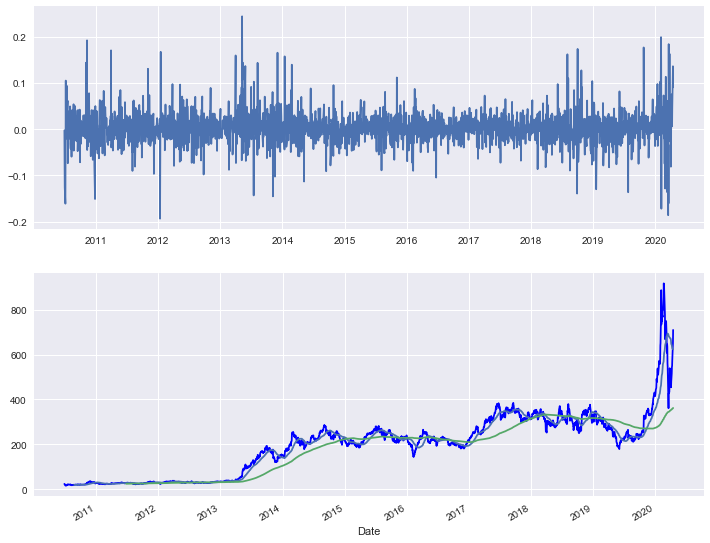

In [150]:
# Plot one stock and it's daily return then weekly or monthly
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,10))
ax1.plot(df.Close.TSLA.pct_change(periods=1))
ax2 = df.Close.TSLA.plot(logy=False,style='b')
df.TSLA_42.plot()
df.TSLA_252.plot()

In [138]:
df.Close['TSLA_mean']= df.Close.TSLA.rolling(2).mean()


/Users/aymanjabri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
df['TSLA_42'] = df.Close.TSLA.rolling(42).mean()
df['TSLA_252'] = df.Close.TSLA.rolling(252).mean()


In [147]:
df.TSLA_mean.head()

Date
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
Name: TSLA_mean, dtype: float64